#### Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Scipy:
* We have the min and max temperatures in a city In India for each months of the year.

* We would like to find a function to describe this and show it graphically, the dataset given below.

#### Task:

1. fitting it to the periodic function
2. plot the fit

#### Data
* Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
* Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

## Solution: 
### Data 

No handles with labels found to put in legend.


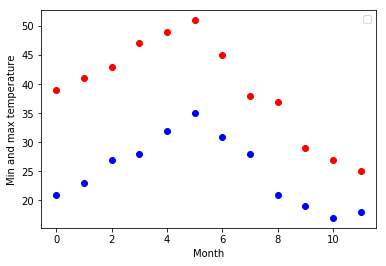

In [12]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.()

###  Fitting it to a periodic function

In [3]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

### Plotting the fit

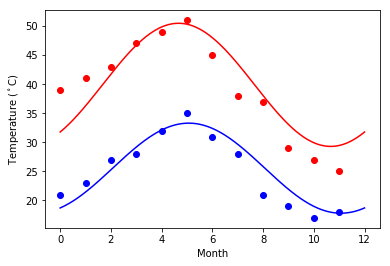

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#### Matplotlib:
This assignment is for visualization using matplotlib:

* Data to use:
* url = https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
* titanic = pd.read_csv(url)

##### Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
url =  'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)

In [6]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##### Task 1

In [7]:
gender_data = titanic['sex'].value_counts()

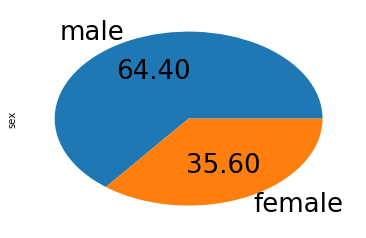

In [8]:
gender_data.plot.pie(fontsize = 26, autopct = '%.2f')

##### Task 2

In [9]:
# Creating a gender column which has value = 1 for female and value = 0 for male

titanic["Gender"] = titanic['sex'].apply(lambda x: 1 if x == 'female' else 0)

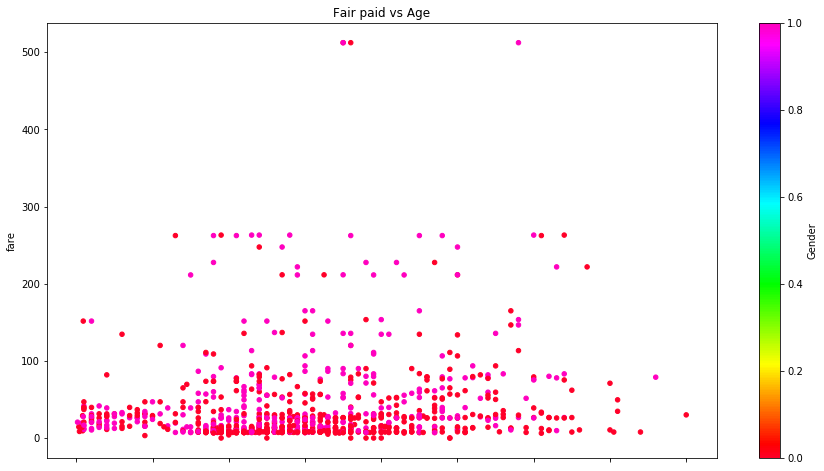

In [10]:
titanic.plot(x = 'age', y = 'fare', kind = 'scatter', title = 'Fair paid vs Age',
             c = 'Gender', figsize = (15,8), colormap = 'gist_rainbow')

So, here in the plot... Red represents the Male and Blue represents the Female

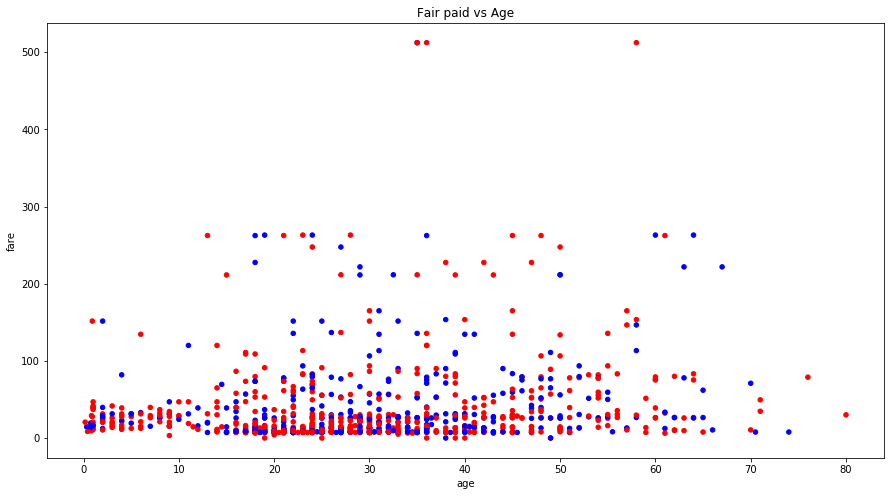

In [11]:
# Method-2 :

colors = {'male':'red', 'female':'blue'}
cmap = titanic['sex'].iloc[:-1].apply(lambda x: colors[x])

titanic.plot(x = 'age', y = 'fare', kind = 'scatter', title = 'Fair paid vs Age',
             c = cmap, figsize = (15,8))

# Done !